In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np 
import gmaps 

In [3]:
crime_data = 'Resources/Crime_data/fatal-police-shootings-data.csv'

crime_df = pd.read_csv(crime_data)
crime_df 

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3229,Kameron Prescott,12/21/2017,shot,unarmed,6.0,M,W,Schertz,TX,False,other,Not fleeing,False
1,16,Autumn Steele,1/6/2015,shot,unarmed,34.0,F,W,Burlington,IA,False,other,Not fleeing,True
2,1165,Ciara Meyer,1/11/2016,shot,unarmed,12.0,F,W,Penn Township,PA,False,other,Not fleeing,False
3,1883,Tyre King,9/14/2016,shot,toy weapon,13.0,M,B,Columbus,OH,False,other,Foot,False
4,27,Omarr Julian Maximillian Jackson,1/7/2015,shot,gun,37.0,M,B,New Orleans,LA,False,attack,Foot,True
5,3117,Jason Ike Pero,11/8/2017,shot,knife,14.0,M,N,Odanah,WI,False,other,Not fleeing,False
6,32,James Dudley Barker,1/8/2015,shot,shovel,42.0,M,W,Salt Lake City,UT,False,attack,Not fleeing,True
7,551,Zane Terryn,6/14/2015,shot,gun,15.0,M,W,Cocoa,FL,True,attack,Not fleeing,False
8,715,Andre Green,8/9/2015,shot,NaN,15.0,M,B,Indianapolis,IN,False,attack,Not fleeing,False
9,916,Jorge Santiago Tapia,10/15/2015,shot,gun,15.0,M,H,Miami,FL,False,attack,Car,False


In [4]:
#Collect year, age, armed, mental illness, gender, age, flee, body camera, states 
#Race had the most discrepancy --> 
crime_df_new = crime_df[['date', 'armed', 'age', 'gender', 'race', 'city','state', 'signs_of_mental_illness', 'flee', 'body_camera']]
crime_df_new
crime_df_rename = crime_df_new.rename(columns = {'date': 'Date of Incident', 
                                                'armed': 'Weapon Used',
                                                'age': 'Age',
                                                'gender': 'Gender',
                                                'race':'Race',
                                                 'city':'City', 
                                                'state': 'State',
                                                'signs_of_mental_illness': 'Mental Illness',
                                                'flee': 'Flee',
                                                'body_camera': 'Body Camera'})


crime_df_rename['Date of Incident']= pd.to_datetime(crime_df_rename['Date of Incident'])
# crime_df_rename.head()

mask = (crime_df_rename['Date of Incident'] > '2015-01-01') &(crime_df_rename['Date of Incident'] <='2018-12-31')
# print(mask)

clean_date = crime_df_rename.loc[mask]
clean_date.head()

,Date of Incident,Weapon Used,Age,Gender,Race,City,State,Mental Illness,Flee,Body Camera
0,2017-12-21,unarmed,6.0,M,W,Schertz,TX,False,Not fleeing,False
1,2015-01-06,unarmed,34.0,F,W,Burlington,IA,False,Not fleeing,True
2,2016-01-11,unarmed,12.0,F,W,Penn Township,PA,False,Not fleeing,False
3,2016-09-14,toy weapon,13.0,M,B,Columbus,OH,False,Foot,False
4,2015-01-07,gun,37.0,M,B,New Orleans,LA,False,Foot,True


In [5]:
clean_date.count()

Date of Incident    3934
Weapon Used         3689
Age                 3801
Gender              3931
Race                3656
City                3934
State               3934
Mental Illness      3934
Flee                3800
Body Camera         3934
dtype: int64

In [6]:
df = clean_date.dropna(how='any')
df.count()

Date of Incident    3272
Weapon Used         3272
Age                 3272
Gender              3272
Race                3272
City                3272
State               3272
Mental Illness      3272
Flee                3272
Body Camera         3272
dtype: int64

In [7]:
min_age = df['Age'].max()
max_age = df['Age'].min()

print(min_age)
print(max_age)

91.0
6.0


In [8]:
 # Create bins for age groups 
bins = [5, 17, 30, 50, 70, 90]

# Create labels for these bins
group_labels = ["5-17", "18-30", "31-50", "51-70", "71-90"]
       
age = pd.cut(df["Age"], bins, labels=group_labels).head()
                

In [9]:
df["Age Range"] = pd.cut(df["Age"], bins, labels=group_labels)
df.head()

C:\Users\alao8\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Date of Incident,Weapon Used,Age,Gender,Race,City,State,Mental Illness,Flee,Body Camera,Age Range
0,2017-12-21,unarmed,6.0,M,W,Schertz,TX,False,Not fleeing,False,5-17
1,2015-01-06,unarmed,34.0,F,W,Burlington,IA,False,Not fleeing,True,31-50
2,2016-01-11,unarmed,12.0,F,W,Penn Township,PA,False,Not fleeing,False,5-17
3,2016-09-14,toy weapon,13.0,M,B,Columbus,OH,False,Foot,False,5-17
4,2015-01-07,gun,37.0,M,B,New Orleans,LA,False,Foot,True,31-50


In [10]:
#Age range of victims
df['Age Range'].value_counts()
# df.sort_values(by=['Age Range'])

31-50    1546
18-30    1147
51-70     473
5-17       69
71-90      36
Name: Age Range, dtype: int64

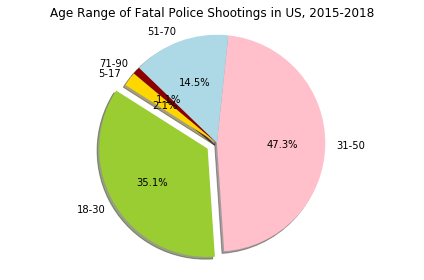

In [11]:
# Pie Chart 
labels = ['5-17', '18-30', '31-50', '51-70', '71-90']
age_counts = [69,1147,1546,473,36]
colors = ['gold','yellowgreen', 'pink', 'lightblue', 'darkred']
explode = (0,0.1,0,0,0)
plt.pie(age_counts, explode=explode, labels=labels, colors=colors,
       autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis('equal')

plt.title('Age Range of Fatal Police Shootings in US, 2015-2018')
plt.tight_layout()
plt.savefig('AgeRangepie.png')
plt.show()

 CA Fatal Shootings per Capita : 1.231041456016178
 TX Fatal Shootings per Capita : 0.9407665505226481
 FL Fatal Shooting per Capita: 0.9812206572769953
 AZ Fatal Shooting per Capita: 2.189068600111545
 OH Fatal Shooting per Capita: 0.8982035928143713


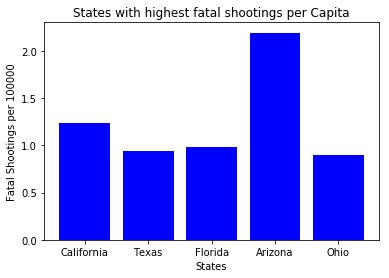

In [12]:
# States with most fatal shootings ,population per capita
# 39.56 million (2018) -CA
# 28.7 million (2018) - TX
# 21.3 million (2018) = FL
# 7.172 million (2018) - AZ
# 11.69 million (2018) - OH 
# 967,171 (2018) - DE
# 626,299 (2018) - VT
# 1.057 million (2018) - RI
# CA    487
# TX    270
# FL    209
# AZ    157
# OH    105


ca_per_cap = ((487/39560000) * 100000)
print(f' CA Fatal Shootings per Capita : {ca_per_cap}')
tx_per_cap = ((270/28700000) * 100000)
print(f' TX Fatal Shootings per Capita : {tx_per_cap }')
fl_per_cap = ((209/21300000) * 100000)
print(f' FL Fatal Shooting per Capita: {fl_per_cap}')
az_per_cap = ((157/7172000)* 100000)
print(f' AZ Fatal Shooting per Capita: {az_per_cap}')
oh_per_cap = ((105/11690000)* 100000)
print(f' OH Fatal Shooting per Capita: {oh_per_cap}')

states =  ['California', 'Texas', 'Florida','Arizona','Ohio']
shooting_per_cap = [1.23,0.94,0.98,2.19,0.90]
x_axis = np.arange(len(shooting_per_cap))
plt.bar(x_axis, shooting_per_cap, color='b', align='center')

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, states)
plt.xlabel('States')
plt.ylabel('Fatal Shootings per 100000')
plt.title('States with highest fatal shootings per Capita')
plt.savefig('Fatalpercap.png')
plt.show()

In [16]:
df['State'].value_counts()



CA    487
TX    270
FL    209
AZ    157
CO    105
OH    105
GA    104
OK     99
NC     94
MO     82
TN     81
WA     79
IL     75
VA     70
PA     69
AL     65
NM     65
IN     64
LA     64
NY     62
KY     60
WI     60
NV     56
MI     55
SC     55
OR     48
MN     44
AR     43
MD     42
NJ     41
UT     39
MS     37
KS     34
ID     27
WV     26
MA     24
IA     23
AK     22
HI     16
MT     13
NE     13
WY     12
DC     12
ME     12
SD     10
NH      9
CT      9
DE      8
ND      8
VT      6
RI      2
Name: State, dtype: int64

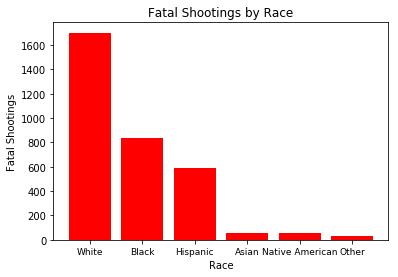

In [132]:
df['Race'].value_counts()

race =  ['White','Black','Hispanic', 'Asian', 'Native American', 'Other']
death_per_race = [1702, 834, 589, 59, 56, 32]
x_axis = np.arange(len(death_per_race))
plt.bar(x_axis, death_per_race, color='r', align='center')

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, race, fontsize=9)
plt.xlabel('Race')
plt.ylabel('Fatal Shootings')
plt.title('Fatal Shootings by Race')
# plt.savefig('Fatalpercap.png')
plt.show()
# W: White, non-Hispanic
# B: Black, non-Hispanic
# A: Asian
# N: Native American
# H: Hispanic
# O: Other
# None: unknown

In [70]:
# mental_illness = df.loc[df['Mental Illness'] == True]
# mental_illness 
not_flee = df.loc[df['Flee'] == 'Not fleeing']
not_flee 

mental_not_flee = not_flee.loc[not_flee['Mental Illness'] == True]
mental_not_flee 

,Date of Incident,Weapon Used,Age,Gender,Race,State,Mental Illness,Flee,Body Camera,Age Range
7,2015-06-14,gun,15.0,M,W,FL,True,Not fleeing,False,5-17
27,2016-02-24,knife,16.0,M,W,MO,True,Not fleeing,False,5-17
28,2016-03-20,toy weapon,16.0,M,B,FL,True,Not fleeing,False,5-17
32,2015-03-01,unarmed,43.0,M,B,CA,True,Not fleeing,True,31-50
40,2015-03-08,knife,43.0,F,B,CA,True,Not fleeing,True,31-50
43,2015-01-22,knife,17.0,F,W,TX,True,Not fleeing,False,5-17
53,2015-06-12,toy weapon,17.0,F,W,IN,True,Not fleeing,False,5-17
54,2015-07-09,gun,17.0,M,W,CA,True,Not fleeing,False,5-17
55,2015-08-20,gun,17.0,M,H,CA,True,Not fleeing,False,5-17
61,2017-01-01,knife,17.0,M,B,IL,True,Not fleeing,False,5-17
